# Fraud Detection with Binary Classification Models

### Prompt:
To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments.

### Feature Explanation:
step: represents a unit of time where 1 step equals 1 hour\
type: type of online transaction\
amount: the amount of the transaction\
nameOrig: customer starting the transaction\
oldbalanceOrg: balance before the transaction\
newbalanceOrig: balance after the transaction\
nameDest: recipient of the transaction\
oldbalanceDest: initial balance of recipient before the transaction\
newbalanceDest: the new balance of recipient after the transaction\
isFraud: fraud transaction

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df = pd.read_csv('POWERBALL.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Draw No                  577 non-null    int64  
 1   Draw Date                577 non-null    object 
 2   Ball 1                   577 non-null    int64  
 3   Ball 2                   577 non-null    int64  
 4   Ball 3                   577 non-null    int64  
 5   Ball 4                   577 non-null    int64  
 6   Ball 5                   577 non-null    int64  
 7   Powerball                577 non-null    int64  
 8   Div1                     577 non-null    int64  
 9   Div2                     577 non-null    int64  
 10  Div3                     577 non-null    int64  
 11  Div4                     577 non-null    int64  
 12  Div5                     577 non-null    int64  
 13  Div6                     577 non-null    int64  
 14  Div7                     5

In [27]:
df.describe()

,Draw No,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Powerball,Div1,Div2,Div3,...,Total Sales,Gauteng Winners,Western Cape Winners,Northern Cape Winners,Eastern Cape Winners,Mpumalanga Winners,Limpopo Winners,Freestate Winners,KZN Winners,North West Winners
count,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,...,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000,577.0000
mean,289.0000,7.8284,15.4489,22.7851,30.8821,38.1733,10.6378,2875913.0953,346540.7366,20861.5078,...,15728751.1447,0.0659,0.0260,0.0017,0.0104,0.0069,0.0121,0.0069,0.0243,0.0087
std,166.7098,6.1557,7.5105,8.2073,7.7958,6.1351,5.7884,10296818.2892,240230.3972,9135.9853,...,5274231.0751,0.2619,0.1698,0.0416,0.1313,0.0830,0.1096,0.0830,0.1751,0.0928
min,1.0000,1.0000,2.0000,4.0000,5.0000,13.0000,1.0000,0.0000,0.0000,6310.0000,...,7404194.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,145.0000,3.0000,9.0000,17.0000,26.0000,35.0000,6.0000,0.0000,181843.0000,15761.0000,...,12954000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,289.0000,7.0000,15.0000,23.0000,32.0000,40.0000,11.0000,0.0000,268013.0000,19351.0000,...,14313722.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,433.0000,12.0000,20.0000,28.0000,37.0000,43.0000,16.0000,0.0000,437507.0000,23369.0000,...,16532880.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,577.0000,33.0000,39.0000,43.0000,44.0000,45.0000,20.0000,102016595.0000,1121916.0000,97278.0000,...,60345061.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000


<AxesSubplot:>

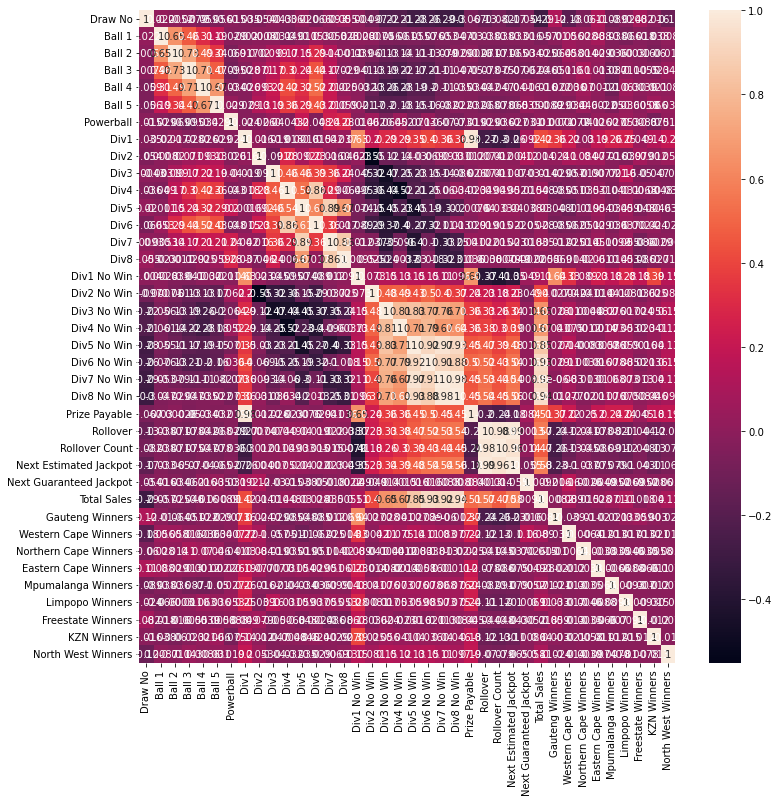

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [31]:
sns.violinplot(df['step'])

KeyError: 'step'

KeyError: 'type'

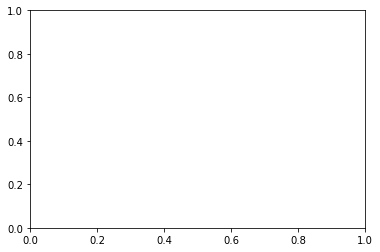

In [32]:
plt.ticklabel_format(style="plain", axis='y')
sns.countplot(df['type'])

KeyError: 'amount'

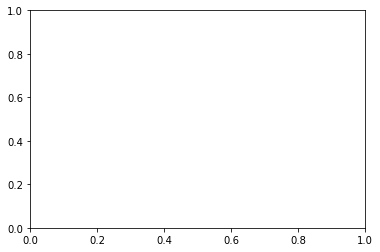

In [33]:
plt.ticklabel_format(style="plain", axis='x')
sns.violinplot(df['amount'])

KeyError: 'amount'

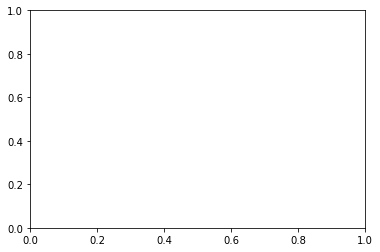

In [34]:
plt.ticklabel_format(style="plain", axis='x')
sns.histplot(df['amount'])
plt.xlim(0,100000)

In [35]:
print(f"There are {df.query('amount > 1000000').shape[0]} transactions over 1,000,000.")

UndefinedVariableError: name 'amount' is not defined

In [ ]:
print(f"There are {df.query('amount > 10000000').shape[0]} transactions over 10,000,000.")

In [36]:
pd.pivot_table(df, index=df['isFraud'], values='isFraud', aggfunc='count')

KeyError: 'isFraud'

In [37]:
pd.pivot_table(df, index=df['isFlaggedFraud'], values='isFlaggedFraud', aggfunc='count')

KeyError: 'isFlaggedFraud'

Let's convert the types to numerical values.

In [38]:
dic = {'PAYMENT': 1, 'TRANSFER':2, "CASH_OUT":3, "DEBIT":4, "CASH_IN":5}
df["type"] = df["type"].map(dic)

KeyError: 'type'

In [39]:
from sklearn.model_selection import train_test_split

x=list(df.columns[:9])
x.remove('nameOrig')
x.remove('nameDest')
x = df[x]
y=df['isFraud']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.33, random_state=1)

ValueError: list.remove(x): x not in list

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

clf = LogisticRegressionCV(cv=5, max_iter=500, random_state=0)
clf.fit(xTrain,yTrain)

In [ ]:
preds = clf.predict(xTest)
print(f"Our accuracy score on the test data is {round(accuracy_score(yTest,preds),5)*100}%")

In [ ]:
accuracy_score(df['isFraud'], df['isFlaggedFraud'])
print(f"The current accuracy score provided in the data set is {round(accuracy_score(df['isFraud'], df['isFlaggedFraud']),5)*100}%")

We will see if we can beat the fraud rate from the data set by trying a different model

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
confmatrix = confusion_matrix(yTest, preds)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=[False, True])
cm.plot(cmap="YlGnBu_r")
plt.show()

## Lets try another model to improve accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rclf = RandomForestClassifier(n_estimators=20, random_state=0, max_depth=6)
Rclf = Rclf.fit(xTrain,yTrain)

In [ ]:
yRPred = Rclf.predict(xTest)
print(f"Our new accuracy score on the test data is {round(accuracy_score(yTest,yRPred),8)*100}%")

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Feature Importance", fontsize= 15)
x= list(df.columns)
x.remove('nameOrig')
x.remove('nameDest')
x.remove('isFraud')
x.remove('isFlaggedFraud')
sns.barplot(y= Rclf.feature_importances_, x = x)

In [ ]:
confmatrix = confusion_matrix(yTest, yRPred)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=[False, True])
cm.plot(cmap="YlGnBu_r")
plt.show()

Now we have only 1 false positive!

In [ ]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
rfcDisplay = RocCurveDisplay.from_estimator(Rclf, xTest, yTest, ax=ax)
clfDisplay = RocCurveDisplay.from_estimator(clf, xTest, yTest, ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(yRPred, yTest, target_names=['Not Fraud', 'Fraud']))

### We can conclude that our random forest model is a pretty good at detecting fraud. 